## Sentiment Analysis

### Business Problem

- This analysis will aim to build a model that can rate the sentiment of a tweet based on its content.
### Objectives

- To build a multimodal classifier that will accurately classify tweets into positive, negative and neutral

In [2]:

# import os
# print(os.getcwd())
# os.chdir('c:/Users/Mzii/Downloads/Documents/Moringa/Projects/phase_4/phase_4_project')

c:\Users\Mzii\Downloads\Documents\Moringa\Projects\phase_4\phase_4_project\work_in_progress


## Importing Relevant Libraries


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
import string
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mzii\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mzii\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading Data

### Importing the Dataset

In [4]:
# import os
# print(os.getcwd())
# os.chdir('c:/Users/Mzii/Downloads/Documents/Moringa/Projects/phase_4/phase_4_project')

In [5]:
# Set display options to show all rows and increase the column width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Read data
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='latin1')

In [6]:
# Checking the first five rows
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


In [7]:
# Simplifying the column names

df.columns = ['tweet','brand','emotion']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    9092 non-null   object
 1   brand    3291 non-null   object
 2   emotion  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Changing column names enhances the dataset's readability, clarity, and user-friendliness. It contributes to smoother data analysis and facilitates sharing insights, as the new names accurately represent the content of the columns.

The dataset contains a total of 9,093 tweets, with nearly all entries having text data. However, only 3,291 entries specify a brand or product, which highlights that many tweets do not directly mention a particular brand. Despite this, each tweet is associated with an emotion, either positive or negative, which helps to understand the sentiment being conveyed.

## Data Cleaning

### Lowercase All the Characters


In [8]:
# lowercase all characters
df['tweet'] = df['tweet'].str.lower()
df['brand'] = df['brand'].str.lower()
df['emotion'] = df['emotion'].str.lower()

In [9]:
df.head()


,tweet,brand,emotion
0,".@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead! i need to upgrade. plugin stations at #sxsw.",iphone,negative emotion
1,"@jessedee know about @fludapp ? awesome ipad/iphone app that you'll likely appreciate for its design. also, they're giving free ts at #sxsw",ipad or iphone app,positive emotion
2,@swonderlin can not wait for #ipad 2 also. they should sale them down at #sxsw.,ipad,positive emotion
3,@sxsw i hope this year's festival isn't as crashy as this year's iphone app. #sxsw,ipad or iphone app,negative emotion
4,"@sxtxstate great stuff on fri #sxsw: marissa mayer (google), tim o'reilly (tech books/conferences) &amp; matt mullenweg (wordpress)",google,positive emotion


### Cleaning of the Brand column

In [10]:
# Identify distribution of column
df['brand'].value_counts()

brand
ipad                               946
apple                              661
ipad or iphone app                 470
google                             430
iphone                             297
other google product or service    293
android app                         81
android                             78
other apple product or service      35
Name: count, dtype: int64

In [11]:
# Map product category to brand

product_mapping = {
    "ipad": "apple",
    "ipad or iphone app": "apple",
    "iphone": "apple",
    "other apple product or service": "apple",
    "other google product or service": "google",
    "android app": "google",
    "android": "google"
}

# Map the 'brand' column to 'brand' using the product mapping
df["brand"] = df["brand"].str.lower().map(product_mapping).fillna(df["brand"])

# Display value counts and info
print(df["brand"].value_counts())
print(df.info())



brand
apple     2409
google     882
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    9092 non-null   object
 1   brand    3291 non-null   object
 2   emotion  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


### Analyzing the Distribution of Missing Values in Brand Column

In [12]:
print(df["brand"].isna().sum())
print(df["brand"].isna().mean())  # Proportion of missing data

5802
0.6380732431540745


### Imputing Missing Values in Brand Column

In [13]:
# Selecting the first 100 lines of 'tweet' column where 'brand' is NaN
column_a_subset = df[df['brand'].isna()]['tweet'].head(100)
column_a_subset

5           @teachntech00 new ipad apps for #speechtherapy and communication are showcased at the #sxsw conference http://ht.ly/49n4m #iear #edchat #asd
6                                                                                                                                                    NaN
16                                                          holler gram for ipad on the itunes app store -  http://t.co/kfn3f5q (via @marc_is_ken) #sxsw
32                                                   attn: all  #sxsw frineds, @mention register for #gdgtlive  and see cobra iradar for android. {link}
33                                                                                                         anyone at  #sxsw want to sell their old ipad?
34                                                                         anyone at  #sxsw who bought the new ipad want to sell their older ipad to me?
35                                          at #sxsw.  oooh. rt @mention google to

It seems that there are words within the tweets that can help us identify the associated brand from the comments. We will create a list of keywords and map them to their respective brands to support our analysis.

In [14]:
# Assign 'apple' or 'google' to 'brand' based on keywords in 'tweet'
df["brand"] = np.where(df["tweet"].str.contains("iphone|ipad|apple|itunes", na=False), "apple",
                       np.where(df["tweet"].str.contains("android|google", na=False), "google", df["brand"]))


In [15]:
# Count "Apple" and "Google"
brand_counts = df["brand"].value_counts()

# Count NaN values
nan_count = df["brand"].isna().sum()

# Display counts
print("Counts for 'apple' and 'google':")
print(brand_counts)

print("\nCount for NaN values:")
print(nan_count)


Counts for 'apple' and 'google':
brand
apple     5606
google    2780
Name: count, dtype: int64

Count for NaN values:
707


In [16]:
# Filter tweets that do not contain any of the keywords
non_matching_tweets = df[df["brand"].isna()]

# Display the tweets that did not match any keyword
print(non_matching_tweets[["tweet"]])


                                                                                                                                                               tweet
6                                                                                                                                                                NaN
51                                  ûï@mention {link} &lt;-- help me forward this doc to all anonymous accounts, techies,&amp; ppl who can help us jam #libya #sxsw
52                                                                                   ÷¼ what? ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newtwitter
53                                                                      .@mention @mention on the location-based 'fast, fun and future' - {link} (via @mention #sxsw
66                                                                          at #sxsw? @mention / @mention wanna buy you a drink. 7pm at fado on 4th. {link} join us!
71        

In [17]:
# Dropping the rows that do not contain any of the key words

df = df[df["brand"].isin(["apple", "google"])]

# Reset the index 
df.reset_index(drop=True, inplace=True)


### Checking and Dropping Duplicates and Missing Values

In [18]:
print("Before removal: ", df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
print("After removal: ",df.duplicated().value_counts())

Before removal:  False    8346
True       40
Name: count, dtype: int64
After removal:  False    8346
Name: count, dtype: int64


In [19]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8346 entries, 0 to 8385
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    8346 non-null   object
 1   brand    8346 non-null   object
 2   emotion  8346 non-null   object
dtypes: object(3)
memory usage: 260.8+ KB


### Cleaning the emotion Column

In [20]:
df["emotion"].value_counts()

emotion
no emotion toward brand or product    4672
positive emotion                      2956
negative emotion                       568
i can't tell                           150
Name: count, dtype: int64

In [21]:
# Understanding the 'I can't tell' sentiments
unknown_emotion = df[df['emotion'] == "i can't tell"]
unknown_emotion.sample(50)

,tweet,brand,emotion
7671,entrapment. layer upon layer rt: @mention google circles will be ______ #sxsw&quot;,google,i can't tell
6480,"how can google load those maps so fast, yet i can barely post a tweet haha #sxsw",google,i can't tell
3978,dang rt @mention confirmed! apple store 2 week popup in austin for #sxsw {link} (via @mention who gave us no credit! ),apple,i can't tell
8150,"from #sxsw: @mention says @mention playing with nfc for next gen devices. nexus s now, iphone 5 next?",apple,i can't tell
3966,nuts. ûï@mention @mention (via @mention #sxsw ipad store sold out of everything except 64gig wifi only whiteû,apple,i can't tell
7845,"this @mention article about #sxsw is so good i'm linking to it on an iphone on a train, which is the opposite of easy: {link}",apple,i can't tell
1307,@mention :) maybe not *entirely* hd (flip? iphone? other xl2 footage?) -- but certainly your concerts at #sxsw. it's gonna be grand.,apple,i can't tell
7798,i'll bet there's a lot of nerds at #sxsw using the #iphone light saber app in barroom brawls instead of their fists.,apple,i can't tell
1963,"did... what my mom might call the big at #sxsw. power plant, cnn, google, and offchain set by trombone shorty at pbs. so sad missed rye rey",google,i can't tell
2518,good place to test it. will it be edgy enough? @mention q2 - google's check in offers? testing at #sxsw {link} #smccolumbus,google,i can't tell


We decided to drop the 'I can't tell' because we wanted to classify the sentiments in 'positive' , 'negative' and 'neutral' as this will help us enhance the quality of our analysis.

In [22]:
# Drop the columns containing "I can't tell"
df = df[df['emotion'] != "i can't tell"]
df['emotion'].value_counts()

emotion
no emotion toward brand or product    4672
positive emotion                      2956
negative emotion                       568
Name: count, dtype: int64

In [23]:
# Emotions dictionary for mapping
emotions_dict = {
    "no emotion toward brand or product": "neutral",
    "positive emotion": "positive",
    "negative emotion": "negative"
}

# Map old labels to new ones and drop NaN values
df["emotion"] = df["emotion"].map(emotions_dict).dropna()

# Check distribution of emotions
emotion_distribution = df["emotion"].value_counts(normalize=True)

# Display results
print(f"Distribution of Emotions:\n{emotion_distribution}")


Distribution of Emotions:
emotion
neutral     0.570034
positive    0.360664
negative    0.069302
Name: proportion, dtype: float64


For the target variable, we can note that we have a class imbalance, so we will perform different oversampling or undersampling techniques after the train test split to avoid data leakage.

## Data Preprocessing

Preprocessing is the first crucial step in working with text data. It involves cleaning and transforming the raw text into a format that can be used for further analysis or modeling.  
In this analysis, we preprocess the textual data by cleaning and tokenizing it, followed by a sentiment-based word frequency analysis. The results are visualized using bar plots and word clouds, providing insights into the most common words associated with different sentiments in the tweets.

Preprocessing Steps:    
- Converting the text to lowercase.     
- Removing URLs, specific words (e.g., "mention," "link," "2," "rt").   
- Removing punctuation.     
- Filtering out common stopwords that do not contribute much to the analysis.   
- Applying lemmatization to reduce words to their base form ensuring consistency across word variations

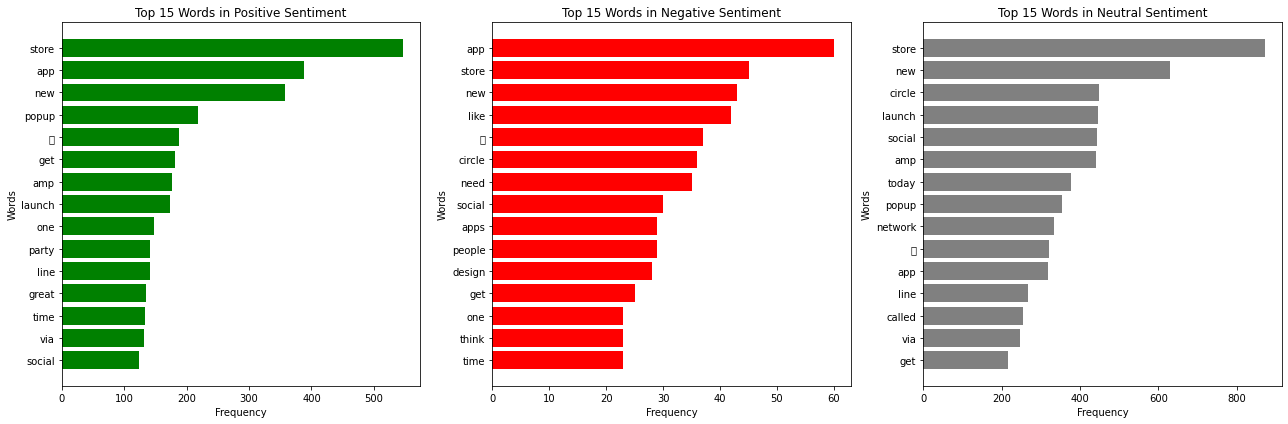

In [24]:

# Initialize Tweet Tokenizer and Lemmatizer
tknzr = TweetTokenizer(strip_handles=True, preserve_case=False)
lemmatizer = WordNetLemmatizer()

# Stopwords and additional custom stopwords
stop_words = set(stopwords.words('english'))
additional_stopwords = ["ipad", "google", "apple", "iphone", "android", "sxsw", "rt", "link", "mention", "austin"]
stop_words.update(additional_stopwords)

# Tokenization, stopword removal, number removal, and lemmatization function
def preprocess_and_tokenize(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = tknzr.tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]  # Lemmatize and remove stopwords
    return tokens

# Apply tokenization and stopword removal
df['tokens'] = df['tweet'].apply(preprocess_and_tokenize)

# Function to get most common words for each sentiment
def get_most_common_words_by_sentiment(df, emotion, column_name, N=15):
    emotion_df = df[df['emotion'] == emotion]
    all_tokens = [token for tokens in emotion_df[column_name] for token in tokens]
    return Counter(all_tokens).most_common(N)

# Get top words for each sentiment
top_positive_words = get_most_common_words_by_sentiment(df, 'positive', 'tokens')
top_negative_words = get_most_common_words_by_sentiment(df, 'negative', 'tokens')
top_neutral_words = get_most_common_words_by_sentiment(df, 'neutral', 'tokens')

# Function to plot word frequencies as a bar chart
def plot_word_frequencies(axes, word_freq, title, color):
    words, freqs = zip(*word_freq)
    axes.barh(words, freqs, color=color)
    axes.set_xlabel('Frequency')
    axes.set_ylabel('Words')
    axes.set_title(title)
    axes.invert_yaxis()  

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

plot_word_frequencies(axes[0], top_positive_words, 'Top 15 Words in Positive Sentiment', 'green')
plot_word_frequencies(axes[1], top_negative_words, 'Top 15 Words in Negative Sentiment', 'red')
plot_word_frequencies(axes[2], top_neutral_words, 'Top 15 Words in Neutral Sentiment', 'gray')

plt.tight_layout()
plt.show()


## Exploratory Data Analysis

### Univariate Analysis

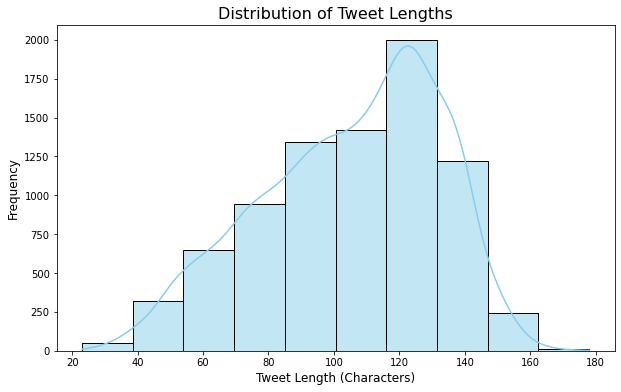

In [25]:
# distribution of text: sentense length analysis
plt.figure(figsize=(10, 6))

sns.histplot(df['tweet'].str.len(), bins=10, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Tweet Lengths', fontsize=16)
plt.xlabel('Tweet Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

The distribution of the texts seem to be left skewed From above histogram, the tweets are comprised of around 29-160 characters.

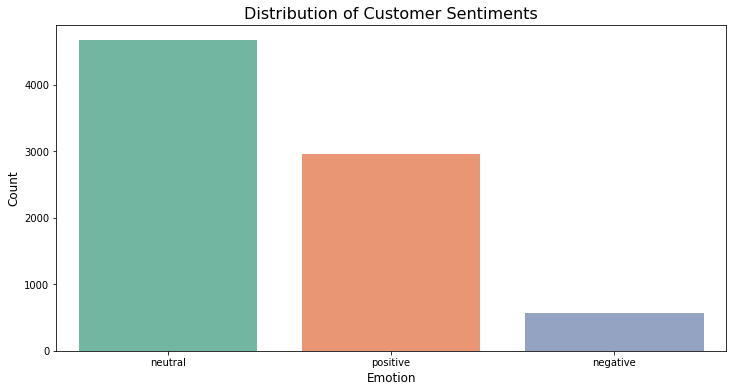

In [26]:
# Creating a countplot for sentiment distribution
plt.figure(figsize=(12, 6))

sns.countplot(x='emotion', data=df, palette='Set2', order=df['emotion'].value_counts().index)

plt.title('Distribution of Customer Sentiments', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

It is evident that there is a class imbalance in the dataset. Neutral sentiment dominates, followed by positive, and then negative sentiment, which is significantly underrepresented.

### Bivariate Analysis


### Sentiment Vs. Brand Analysis
This analysis examines how sentiment (positive, negative, neutral) is distributed across the two brands, specifically Apple and Google, as mentioned in the tweets. By doing so, we can gain insights into customer perceptions and attitudes toward each brand. This will help understand how each brand is viewed by its users in terms of sentiment.

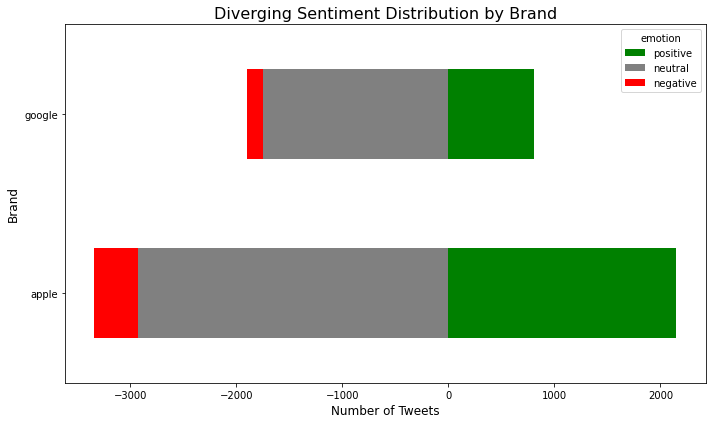

In [27]:

df_grouped = df.groupby(['brand', 'emotion']).size().unstack(fill_value=0)

df_grouped['positive'] = df_grouped['positive'] * 1  
df_grouped['neutral'] = df_grouped['neutral'] * -1   
df_grouped['negative'] = df_grouped['negative'] * -1  

df_grouped[['positive', 'neutral', 'negative']].plot(kind='barh', stacked=True, color=['green', 'gray', 'red'], figsize=(10, 6))

plt.title('Diverging Sentiment Distribution by Brand', fontsize=16)
plt.xlabel('Number of Tweets', fontsize=12)
plt.ylabel('Brand', fontsize=12)

plt.tight_layout()
plt.show()


Mentions of Apple products in the tweets show more extreme opinions, with both stronger positive and negative feelings compared to Google. In contrast, tweets about Google tend to have a more balanced and neutral tone. This suggests that Apple’s products may provoke stronger emotional responses, whether positive or negative, from users.

### Sentiment Vs. Tweet Length

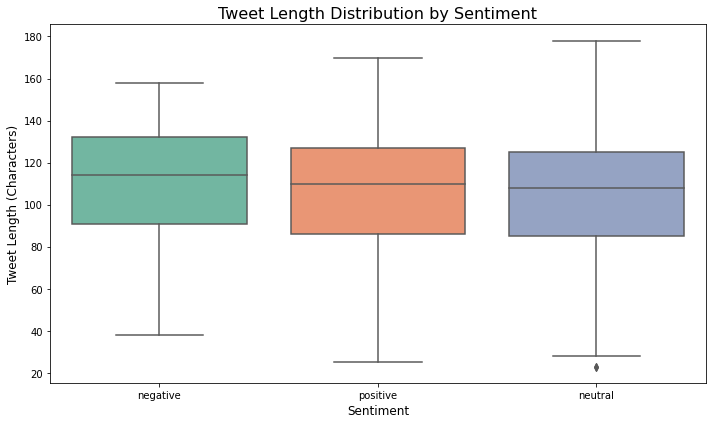

In [28]:

# Plotting a boxplot to visualize tweet length by sentiment
df['tweet_length'] = df['tweet'].str.len()

plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion', y='tweet_length', data=df, palette="Set2")

plt.title('Tweet Length Distribution by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Tweet Length (Characters)', fontsize=12)

plt.tight_layout()
plt.show()


From the box plots, we notice that most of the tweets whose lengths are longer hold negative sentiments. Also, the margine between the three sentiments is not too far apart. Therefore, it is safe to say that the length of the tweets is not enough to conclude on the customers' sentiments

## Modeling

### Label Encode Sentiments

In [29]:
label_encoder = LabelEncoder()
df['emotion_encoded'] = label_encoder.fit_transform(df['emotion'])
df.head()

,tweet,brand,emotion,tokens,tweet_length,emotion_encoded
0,".@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead! i need to upgrade. plugin stations at #sxsw.",apple,negative,"[wesley, g, hr, tweeting, riseaustin, dead, need, upgrade, plugin, station]",127,0
1,"@jessedee know about @fludapp ? awesome ipad/iphone app that you'll likely appreciate for its design. also, they're giving free ts at #sxsw",apple,positive,"[jessedee, know, fludapp, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, giving, free, t]",139,2
2,@swonderlin can not wait for #ipad 2 also. they should sale them down at #sxsw.,apple,positive,"[swonderlin, wait, also, sale]",79,2
3,@sxsw i hope this year's festival isn't as crashy as this year's iphone app. #sxsw,apple,negative,"[hope, year, festival, isnt, crashy, year, app]",82,0
4,"@sxtxstate great stuff on fri #sxsw: marissa mayer (google), tim o'reilly (tech books/conferences) &amp; matt mullenweg (wordpress)",google,positive,"[sxtxstate, great, stuff, fri, marissa, mayer, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]",131,2


### Joining Tokens


In [30]:
# Join the tokens back into strings
df['tokens_joined'] = df['tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))


### Train Test Split

In [31]:
X = df['tokens_joined']  
y = df['emotion_encoded']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [32]:
# Function to print performance metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"Performance of {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## Building a baseline model - Logistic regression

Performance of Logistic Regression:
Accuracy: 0.5856515373352855

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.31      0.30       139
           1       0.67      0.65      0.66      1163
           2       0.52      0.53      0.53       747

    accuracy                           0.59      2049
   macro avg       0.49      0.50      0.50      2049
weighted avg       0.59      0.59      0.59      2049



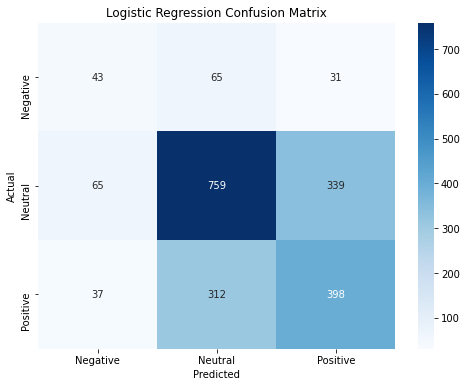

In [33]:
logreg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Text vectorization
    ('scaler', StandardScaler(with_mean=False)),  # Feature scaling (after TF-IDF)
    ('logreg', LogisticRegression(class_weight='balanced'))  # Logistic Regression (handling class imbalance)
])

# Train and predict
logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")



## SVM

Performance of SVM:
Accuracy: 0.6246949731576379

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.26      0.31       139
           1       0.68      0.71      0.69      1163
           2       0.56      0.57      0.56       747

    accuracy                           0.62      2049
   macro avg       0.55      0.51      0.52      2049
weighted avg       0.62      0.62      0.62      2049



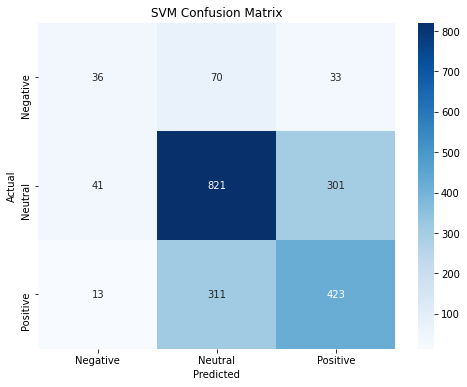

In [34]:
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Text vectorization
    ('scaler', StandardScaler(with_mean=False)),  # Feature scaling
    ('svm', SVC(class_weight='balanced'))  # SVM with class balancing
])

# Train and predict
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred_svm, "SVM")


## Random Forest

Performance of Random Forest:
Accuracy: 0.6232308443142996

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.24      0.30       139
           1       0.66      0.77      0.71      1163
           2       0.58      0.47      0.52       747

    accuracy                           0.62      2049
   macro avg       0.54      0.49      0.51      2049
weighted avg       0.61      0.62      0.61      2049



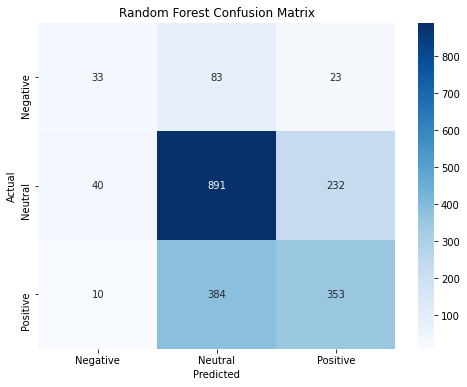

In [35]:
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Text vectorization
    ('rf', RandomForestClassifier(class_weight='balanced'))  # Random Forest with class balancing
])

# Train and predict
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred_rf, "Random Forest")


## Naive Bayes

Performance of Naive Bayes:
Accuracy: 0.6290873596876525

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.04      0.07       139
           1       0.63      0.87      0.73      1163
           2       0.61      0.36      0.45       747

    accuracy                           0.63      2049
   macro avg       0.65      0.42      0.42      2049
weighted avg       0.63      0.63      0.59      2049



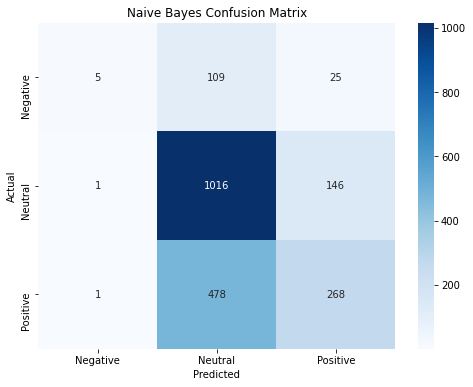

In [36]:
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Text vectorization
    ('nb', MultinomialNB())  # Naive Bayes classifier
])

# Train and predict
nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred_nb, "Naive Bayes")


### XGBoost

[13:18:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Performance of XGBoost with SMOTE:
Accuracy: 0.6281112737920937

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.27      0.31       139
           1       0.67      0.78      0.72      1163
           2       0.59      0.46      0.52       747

    accuracy                           0.63      2049
   macro avg       0.54      0.50      0.51      2049
weighted avg       0.62      0.63      0.62      2049



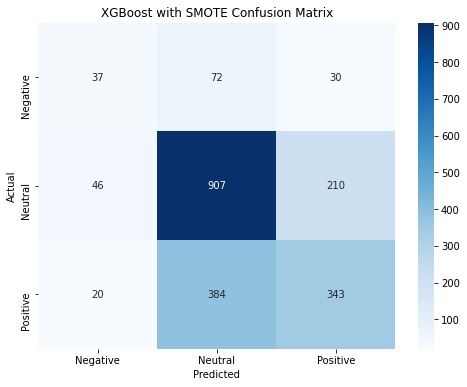

In [39]:
# Vectorize the text data using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Convert the sparse matrix to a dense matrix for SMOTE
X_train_dense = X_train_tfidf.toarray()

# Apply SMOTE to the dense vectorized training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_dense, y_train)

# Train the XGBoost model
xgb = XGBClassifier(objective='binary:logistic', scale_pos_weight=3, random_state=42)
xgb.fit(X_train_smote, y_train_smote)

# Convert X_test to a dense matrix and predict
y_pred_xgb = xgb.predict(X_test_tfidf.toarray())

# Evaluate the model performance
evaluate_model(y_test, y_pred_xgb, "XGBoost with SMOTE")


## Hyperparameter Tuning the Models
Using Grid Search and Random Search to fine-tune hyperparameters for each model.

### Logistic Regression Tuning

Best parameters for Logistic Regression: {'logreg__C': 0.01, 'logreg__solver': 'lbfgs'}
Performance of Tuned Logistic Regression:
Accuracy: 0.6085895558809176

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.32      0.31       139
           1       0.69      0.67      0.68      1163
           2       0.55      0.57      0.56       747

    accuracy                           0.61      2049
   macro avg       0.51      0.52      0.52      2049
weighted avg       0.61      0.61      0.61      2049



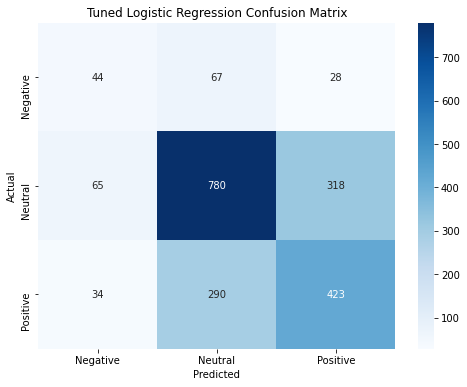

In [41]:
logreg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Text vectorization
    ('scaler', StandardScaler(with_mean=False)),  # Feature scaling
    ('logreg', LogisticRegression(class_weight='balanced'))  # Logistic Regression
])

# Hyperparameter grid for Logistic Regression
param_grid_logreg = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__solver': ['liblinear', 'lbfgs', 'saga']  # Solvers
}

# Grid Search
grid_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

# Best Parameters and Evaluate
print(f"Best parameters for Logistic Regression: {grid_logreg.best_params_}")
y_pred_logreg = grid_logreg.predict(X_test)
evaluate_model(y_test, y_pred_logreg, "Tuned Logistic Regression")

### SVM Tuning

Best parameters for SVM: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Performance of Tuned SVM:
Accuracy: 0.6144460712542704

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.25      0.30       139
           1       0.67      0.72      0.69      1163
           2       0.55      0.52      0.53       747

    accuracy                           0.61      2049
   macro avg       0.53      0.50      0.51      2049
weighted avg       0.61      0.61      0.61      2049



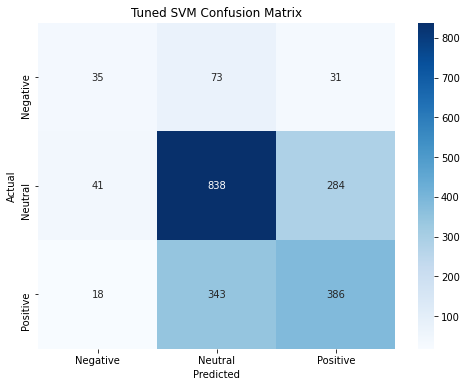

In [42]:
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Text vectorization
    ('scaler', StandardScaler(with_mean=False)),  # Feature scaling
    ('svm', SVC(class_weight='balanced'))  # SVM
])

# Hyperparameter grid for SVM
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

# Grid Search
grid_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# Best Parameters and Evaluate
print(f"Best parameters for SVM: {grid_svm.best_params_}")
y_pred_svm = grid_svm.predict(X_test)
evaluate_model(y_test, y_pred_svm, "Tuned SVM")


### Random Forest Tuning

Best parameters for Random Forest: {'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Performance of Tuned Random Forest:
Accuracy: 0.6354319180087847

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.27      0.30       139
           1       0.68      0.75      0.71      1163
           2       0.60      0.53      0.56       747

    accuracy                           0.64      2049
   macro avg       0.54      0.52      0.52      2049
weighted avg       0.63      0.64      0.63      2049



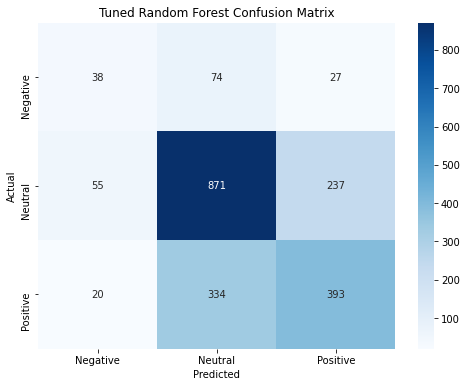

In [43]:
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Text vectorization
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))  # Random Forest
])

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'rf__n_estimators': [100, 200, 500],
    'rf__max_depth': [10, 50, None],
    'rf__min_samples_split': [2, 5, 10]
}

# Grid Search
grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best Parameters and Evaluate
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")
y_pred_rf = grid_rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Tuned Random Forest")


### Naive Bayes Tuning

Best parameters for Naive Bayes: {'nb__alpha': 1}
Performance of Tuned Naive Bayes:
Accuracy: 0.6290873596876525

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.04      0.07       139
           1       0.63      0.87      0.73      1163
           2       0.61      0.36      0.45       747

    accuracy                           0.63      2049
   macro avg       0.65      0.42      0.42      2049
weighted avg       0.63      0.63      0.59      2049



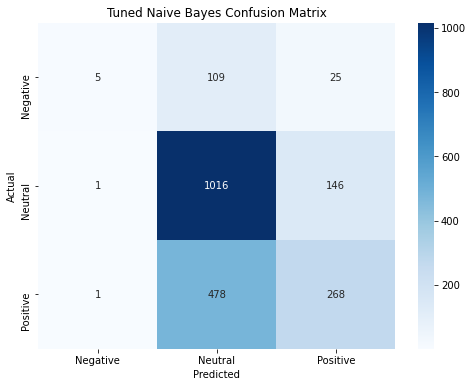

In [44]:
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Text vectorization
    ('nb', MultinomialNB())  # Naive Bayes
])

# Hyperparameter grid for Naive Bayes
param_grid_nb = {
    'nb__alpha': [0.01, 0.1, 1, 10]  # Smoothing parameter
}

# Grid Search
grid_nb = GridSearchCV(nb_pipeline, param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)

# Best Parameters and Evaluate
print(f"Best parameters for Naive Bayes: {grid_nb.best_params_}")
y_pred_nb = grid_nb.predict(X_test)
evaluate_model(y_test, y_pred_nb, "Tuned Naive Bayes")
